In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\Country-data.csv", index_col=0)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)

In [8]:
#using Kmeans
Ks = [2,3,4,5, 6, 7, 8, 9, 10]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24, init='random')
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\

Best no. of clusters: 5
Best Score: 0.3064507657886972


In [9]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24)
clust.fit(df_scaled)
clust_data=df.copy()
clust_data['Clust'] = clust.labels_
clust_data.groupby('Clust').mean()

C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clust,,,,,,,,,
0,26.917778,30.977533,5.389333,33.803687,12301.333333,10.857689,72.206667,2.566222,6009.244444
1,94.180435,28.928478,6.344565,42.502174,3752.021739,11.920109,59.013043,5.017826,1866.347826
2,15.160870,52.208696,7.189565,62.150000,14791.521739,3.851261,73.973913,2.005000,8964.043478
3,4.300000,37.900000,10.573636,36.054545,40018.181818,1.541955,80.913636,1.800000,45268.181818
4,6.937500,113.137500,5.063750,87.787500,72025.000000,6.445500,79.500000,1.772500,50062.500000


In [10]:
clust_country = clust_data.groupby('Clust').mean()
#clust_country.to_csv("Clust_country.csv")

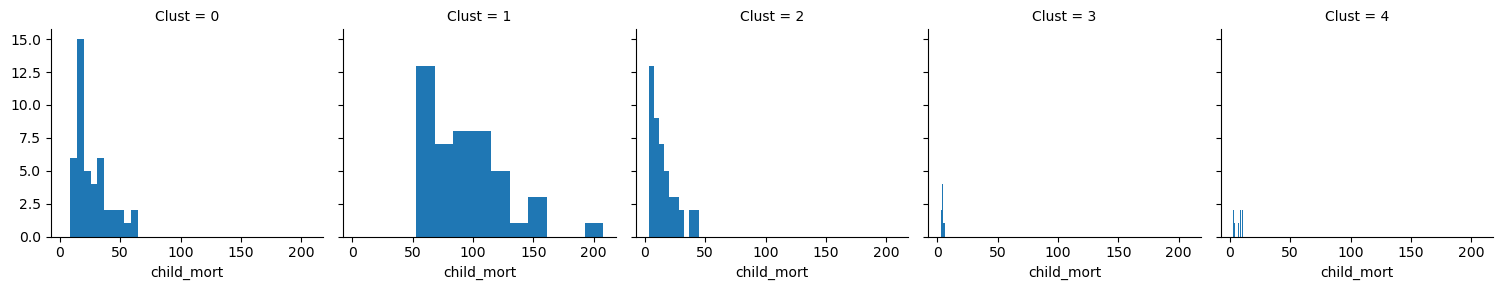

In [12]:
g = sns.FacetGrid(clust_data, col ="Clust")
g.map(plt.hist, "child_mort");

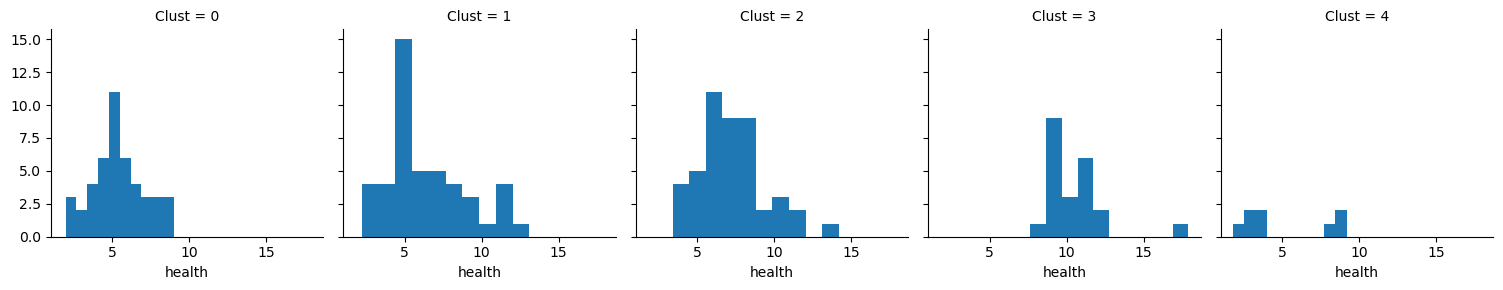

In [13]:
g = sns.FacetGrid(clust_data, col ="Clust")
g.map(plt.hist, "health");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


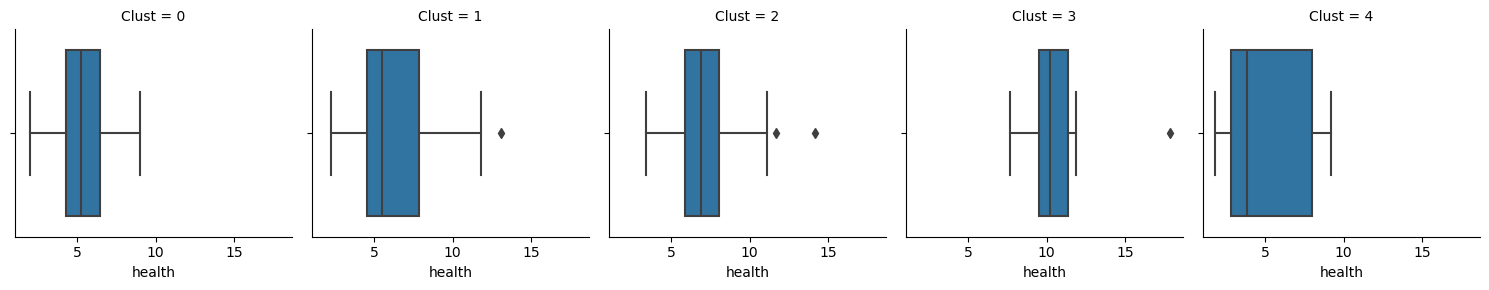

In [15]:
g = sns.FacetGrid(clust_data, col ="Clust")
g.map(sns.boxplot, "health");

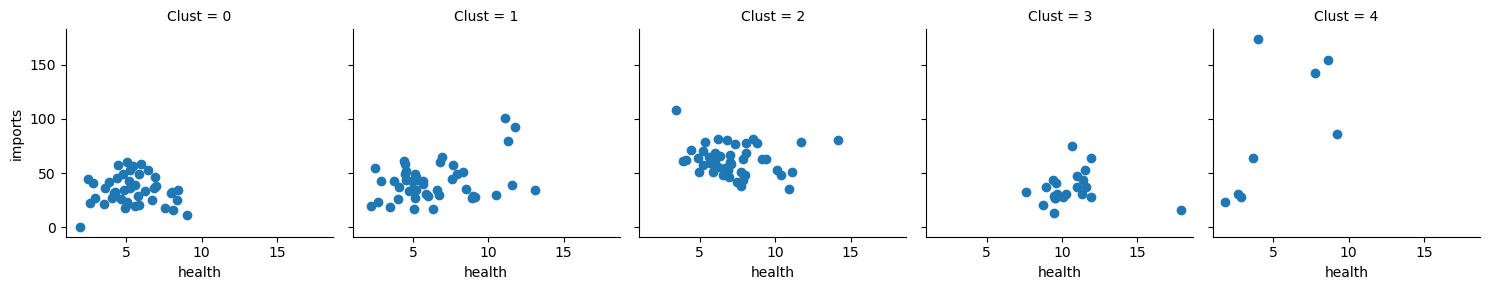

In [23]:
g = sns.FacetGrid(clust_data, col ="Clust")
g.map(plt.scatter, "health", "imports" );